
# Chapter 10: Deep Learning

## 10.9.1 A Single Layer Network on the Hitters Data


In [1]:
library(ISLR2)

In [2]:
Gitters <- na.omit(Hitters)

In [3]:
Gitters

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<dbl>,<fct>
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.000,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.000,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.000,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.500,N
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.000,A
-Al Newman,185,37,1,23,8,21,2,214,42,1,30,9,24,N,E,76,127,7,70.000,A
-Argenis Salazar,298,73,0,24,24,7,3,509,108,0,41,37,12,A,W,121,283,9,100.000,A
-Andres Thomas,323,81,6,26,32,8,2,341,86,6,32,34,8,N,W,143,290,19,75.000,N
-Andre Thornton,401,92,17,49,66,65,13,5206,1332,253,784,890,866,A,E,0,0,0,1100.000,A


In [4]:
n <- nrow(Gitters)
n

[1] 263

In [5]:
set.seed(13)
ntest <- trunc(n / 3)
testid <- sample(1:n, ntest)

In [6]:
testid

[1] 259  74 205 132 221 248  55  23   5 140  49  54 184  32 250 125  47  81 188
[20] 253  11  68 120  87  78  61 117 131 223 236 197 190 242 222  66 129  62  51
[39] 216 127 115 118  60 244  76 251  42 182 227 119 199  15 157 113  14 185 121
[58] 160  31 146 258 179 233 239 263  77 176 228 105  97 159  48 143 232 124 247
[77] 166 136 142 139 195  84  17 153 147  53   7

## Fit glmnet

In [7]:
#install.packages('glmnet')
library(glmnet)

Loading required package: Matrix

Loaded glmnet 4.1-8



In [8]:
x <- scale(model.matrix(Salary ~ . -1, data = Gitters))
x

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,LeagueA,LeagueN,DivisionW,PutOuts,Assists,Errors,NewLeagueN
-Alan Ashby,-0.60175321,-0.594541907,-0.5275454,-1.203816332,-0.52106946,-0.09734151,1.39523337,0.34613058,0.17404158,-0.002914243,-0.12143933,0.25847281,0.43450593,-1.0567429,1.0567429,0.9792988,1.21917406,-0.52219572,0.21294608,1.0730066
-Alvin Davis,0.51156637,0.491322826,0.7285771,0.440674789,0.79254856,1.60631004,-0.89948530,-0.45200360,-0.40911209,-0.075909091,-0.41431499,-0.19921055,0.01035326,0.9427059,-0.9427059,0.9792988,2.10509535,-0.25337958,0.81840359,-0.9284171
-Andre Dawson,0.62697145,0.735088378,0.9569630,0.401520238,1.02436351,-0.18943079,0.76940101,1.29908093,1.31566516,1.894951816,1.40936438,1.56967378,0.35497730,-1.0567429,1.0567429,-1.0172561,-0.32404367,-0.74276281,-0.84660456,1.0730066
-Andres Galarraga,-0.56102200,-0.461578879,-0.1849665,-0.616498075,-0.36652617,-0.51174324,-1.10809609,-0.98904951,-0.95832560,-0.696365303,-0.94571825,-0.87955068,-0.86067453,-1.0567429,1.0567429,-1.0172561,1.83717561,-0.54287389,-0.69524018,1.0730066
-Alfredo Griffin,1.29224779,1.355582512,-0.8701243,0.753911193,-0.01880375,-0.28152006,0.76940101,0.76553369,0.63377648,-0.611204646,0.42204128,0.01726131,-0.25095507,0.9427059,-0.9427059,0.9792988,-0.03111808,2.08325298,2.48341175,-0.9284171
-Al Newman,-1.48426263,-1.569604117,-1.2127031,-1.242970882,-1.68014419,-0.92614497,-1.10809609,-1.06864426,-1.04934694,-0.830189192,-1.00006631,-0.99397151,-0.89475822,-1.0567429,1.0567429,-1.0172561,-0.76700431,0.05679288,-0.24114705,-0.9284171
-Argenis Salazar,-0.71715829,-0.771825945,-1.3268961,-1.203816332,-1.06197100,-1.57076988,-0.89948530,-0.93963079,-0.94752646,-0.842355000,-0.96685361,-0.90738277,-0.94020315,0.9427059,-0.9427059,0.9792988,-0.60625247,1.13205742,0.06158171,-0.9284171
-Andres Thomas,-0.54744494,-0.594541907,-0.6417383,-1.125507231,-0.75288441,-1.52472525,-1.10809609,-1.01310287,-0.98146662,-0.769360151,-0.99402764,-0.91666014,-0.95535146,-1.0567429,1.0567429,0.9792988,-0.52766267,1.18030647,1.57522548,1.0730066
-Andre Thornton,-0.01793928,-0.350776355,0.6143841,-0.224952570,0.56073362,1.09981904,1.18662259,1.11452606,0.94078066,2.235594442,1.27651356,1.73048144,2.29396091,0.9427059,-0.9427059,-1.0172561,-1.03849632,-0.81858274,-1.30069770,-0.9284171
-Alan Trammell,1.15647711,1.133977464,1.0711560,2.046011359,0.90845603,0.82355122,0.56079022,0.86305913,0.89141315,0.252567726,1.02892795,0.53679377,0.86244567,0.9427059,-0.9427059,-1.0172561,-0.18829766,2.24867830,2.02931862,-0.9284171


In [9]:
y <- Gitters$Salary

In [10]:
cvfit <- cv.glmnet(x[-testid, ], y[-testid],
type.measure = "mae")

In [11]:
cvfit


Call:  cv.glmnet(x = x[-testid, ], y = y[-testid], type.measure = "mae") 

Measure: Mean Absolute Error 

    Lambda Index Measure    SE Nonzero
min   6.25    39   236.6 29.74      13
1se  70.18    13   264.7 26.31       6

In [12]:
cpred <- predict(cvfit, x[testid, ], s = "lambda.min")

In [13]:
mean(abs(y[testid] - cpred))

[1] 252.2994

## Fit a neural network

To fit the neural network, we first set up a model structure that describes the network.

In [14]:
#install.packages('keras')
library(keras)

In [15]:
modnn <- keras_model_sequential() %>%
layer_dense(units = 50, activation = "relu", input_shape = ncol(x)) %>%
layer_dropout(rate = 0.4) %>% 
layer_dense(units = 1)

We have created a vanilla model object called *modnn*, and have added details about the successive layers in a sequential manner, using the function keras model *sequential( )*. The pipe operator %>% passes the previous term as the first argument to the next function, and returns the result. It allows us to specify the layers of a neural network in a readable form.

In [16]:
modnn

Model: "sequential"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1 (Dense)                    (None, 50)                      1050        
 dropout (Dropout)                  (None, 50)                      0           
 dense (Dense)                      (None, 1)                       51          
Total params: 1101 (4.30 KB)
Trainable params: 1101 (4.30 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________

The object *modnn* has a single hidden layer with 50 hidden units, and a ReLU activation function. It then has a dropout layer, in which a random 40% of the 50 activations from the previous layer are set to zero during each iteration of the stochastic gradient descent algorithm. Finally, the output layer has just one unit with no activation function, indicating that the model provides a single quantitative
output.

In [17]:
x <- model.matrix(Salary ~ . - 1, data = Gitters) %>% scale()

In [18]:
 modnn %>% compile(loss = "mse",optimizer = optimizer_rmsprop(),
metrics = list("mean_absolute_error") )

Now we fit the model. We supply the training data and two fitting parameters, epochs and batch size. Using 32 for the latter means that at each step of SGD, the algorithm randomly selects 32 training observations for the computation of the gradient. Recall from Sections 10.4 and 10.7 that an epoch amounts to the number of SGD steps required to process $n$ observations. Since the training set has $n = 176$, an epoch is 176/32 = 5.5 SGD steps. The fit() function has an argument validation data; these data are not used in the fitting, but can be used to track the progress of the model (in this case reporting the mean absolute error).

In [19]:
 history <- modnn %>% fit(
x[-testid, ], y[-testid], epochs = 1500, batch_size = 32, validation_data = list(x[testid, ], y[testid]))

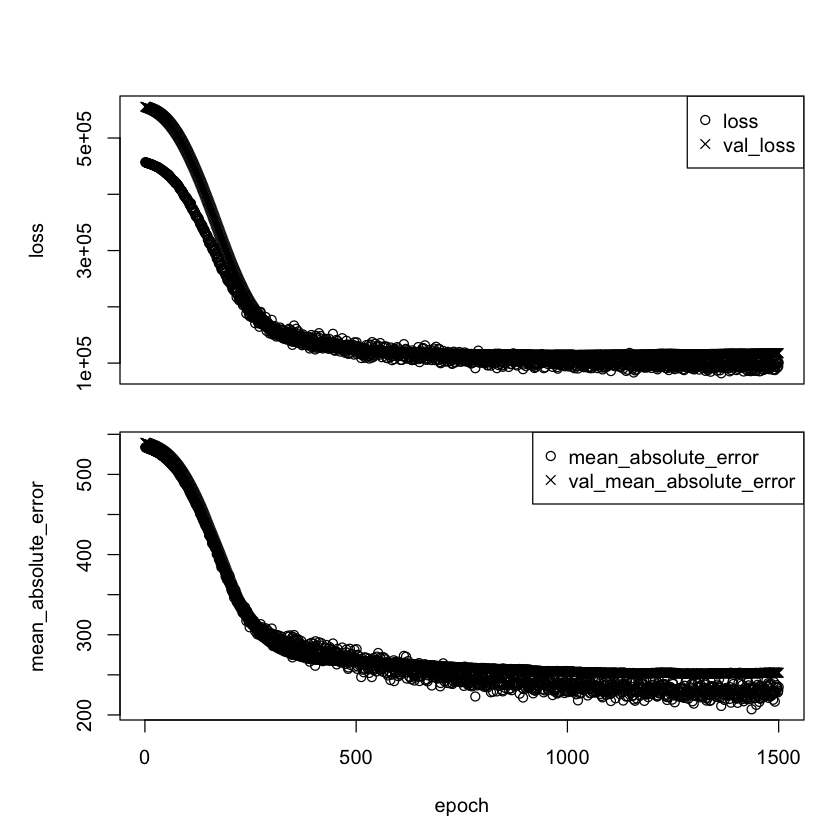

In [20]:
plot(history)

Finally, we predict from the final model, and evaluate its performance on the test data. Due to the use of SGD, the results vary slightly with each fit. Unfortunately the set.seed() function does not ensure identical results (since the fitting is done in python), so your results will differ slightly.


In [21]:
npred <- predict(modnn, x[testid, ])
mean(abs(y[testid] - npred))

[1] 252.6895

## 10.9.2 A Multilayer Network on the MNIST Digit Data
The keras package comes with a number of example datasets, including the MNIST digit data. Our first step is to load the MNIST data. The dataset *mnist()* function is provided for this purpose.

In [22]:
mnist <- dataset_mnist()

In [23]:
x_train <- mnist$train$x 
x_test <- mnist$test$x
g_train <- mnist$train$y 
g_test <- mnist$test$y

In [24]:
dim(x_train)
dim(x_test)
c(nrow(x_train))

[1] 60000    28    28

[1] 10000    28    28

[1] 60000

In [25]:
# reshape x's to 60000x784
x_train <- array_reshape(x_train, c(nrow(x_train), 784))
x_test <- array_reshape(x_test, c(nrow(x_test), 784))
#one-hot encoding of y
y_train <- to_categorical(g_train, 10)
y_test <- to_categorical(g_test, 10)

In [26]:
#Here the inputs are eight-bit26 grayscale values between 0 and 255, 
#so we rescale to the unit interval.
x_train <- x_train / 255
x_test <- x_test / 255

In [27]:
#fit the neural network
modelnn <- keras_model_sequential()
modelnn %>%
        layer_dense(units = 256, activation = 'relu', input_shape = c(784)) %>%
        layer_dropout(rate = 0.4) %>%
        layer_dense(units = 128, activation = 'relu') %>%
        layer_dropout(rate = 0.3) %>%
        layer_dense(units = 10, activation = 'softmax')


In [28]:
modelnn

Model: "sequential_1"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_4 (Dense)                    (None, 256)                     200960      
 dropout_2 (Dropout)                (None, 256)                     0           
 dense_3 (Dense)                    (None, 128)                     32896       
 dropout_1 (Dropout)                (None, 128)                     0           
 dense_2 (Dense)                    (None, 10)                      1290        
Total params: 235146 (918.54 KB)
Trainable params: 235146 (918.54 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________

In [29]:
modelnn %>% compile(loss = "categorical_crossentropy", 
                    optimizer = optimizer_rmsprop(), metrics = c("accuracy"))

In [30]:
system.time(history <- modelnn %>% fit(x_train, y_train, epochs = 30, batch_size = 128,
        validation_split = 0.2))

   user  system elapsed 
131.197  13.583  82.924 

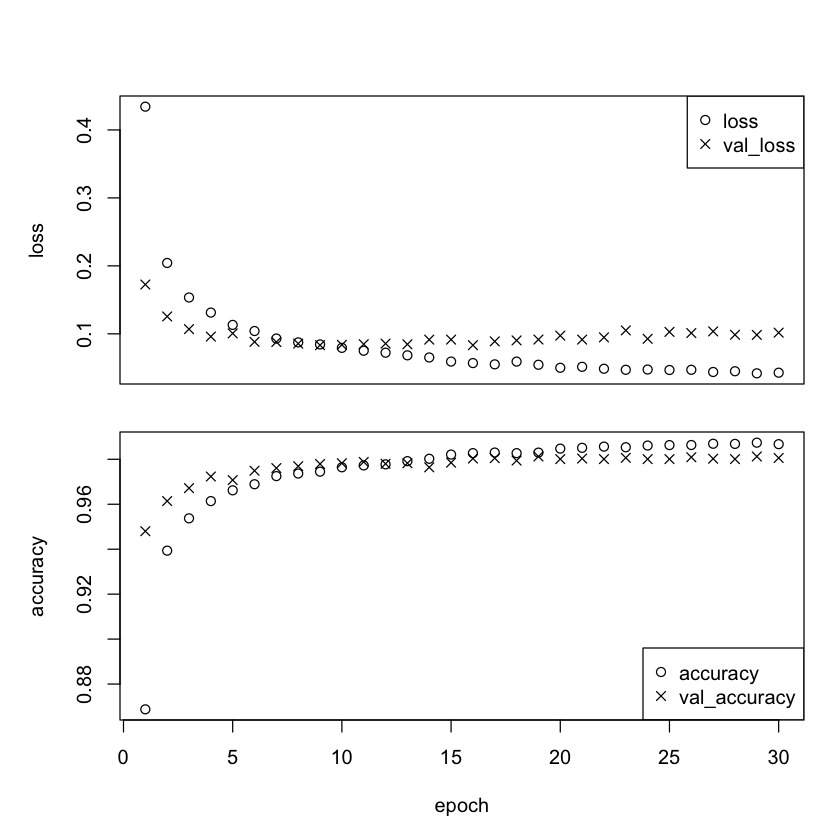

In [31]:
plot(history, smooth = FALSE)

# References

Chapter 10, **An Introduction to Statistical Learning with Applications in R**, Gareth James, Daniela Witten, Trevor Hastie, and Robert Tibshirani